In [35]:
# Importing libraries
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import os
import matplotlib.pyplot as plot
import cv2

In [7]:
# Initialising the CNN
classifier = Sequential()

In [8]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [9]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
# Step 3 - Flattening
classifier.add(Flatten())

In [12]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [26]:
# Compiling the CNN
adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

## Partie 2 - CNN

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [41]:
classifier.fit_generator(training_set,
                         epochs = 25,
                         validation_data = test_set)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19136\2792549224.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/25
250/250 [==============================] - 25s 98ms/step - loss: 0.2536 - accuracy: 0.8923 - val_loss: 0.5474 - val_accuracy: 0.7905
Epoch 2/25
250/250 [==============================] - 25s 98ms/step - loss: 0.2330 - accuracy: 0.9032 - val_loss: 0.7008 - val_accuracy: 0.7580
Epoch 3/25
250/250 [==============================] - 25s 101ms/step - loss: 0.2201 - accuracy: 0.9090 - val_loss: 0.5760 - val_accuracy: 0.8040
Epoch 4/25
250/250 [==============================] - 25s 101ms/step - loss: 0.2158 - accuracy: 0.9090 - val_loss: 0.5441 - val_accuracy: 0.8080
Epoch 5/25
250/250 [==============================] - 25s 99ms/step - loss: 0.2095 - accuracy: 0.9149 - val_loss: 0.5223 - val_accuracy: 0.8075
Epoch 6/25
250/250 [==============================] - 25s 98ms/step - loss: 0.2003 - accuracy: 0.9180 - val_loss: 0.5719 - val_accuracy: 0.8070
Epoch 7/25
250/250 [==============================] - 25s 98ms/step - loss: 0.1923 - accuracy: 0.9222 - val_loss: 0.5594 - val_accurac

## Partie 3 - Prédictions

In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 22ms/step
cat


1/1 [==============================] - 0s 17ms/step


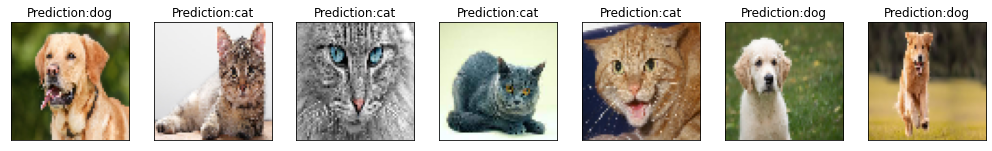

In [43]:
basePath = './dataset/single_prediction'
ImageList = []
for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            ImageList.append(basePath+'/'+filename)

fig = plot.figure(1, (18, 4))

for i in range(len(ImageList)):
        ax = plot.subplot(2, 9, i+1)
        test_image = image.load_img(ImageList[i], target_size = (64, 64))
        ax.imshow(test_image, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = classifier.predict(test_image)
        if result[0][0] == 1:
            prediction = 'dog'
        else:
            prediction = 'cat'


        ax.set_title(f"Prediction:{prediction}")


        plot.tight_layout()